# Problem Set 4, due '05/23/2017' at 3:30pm.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import time

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.17.1.


In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()


---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [4]:
# uncomment the following if you want to see a lengthy description of the dataset
print "keys:", bdata.keys()
# print "feature names:",  bdata.feature_names
# print "data shape:", bdata.data.shape
# print "target shape", bdata.target.shape
print bdata.DESCR
# print "-"*80



keys: ['data', 'feature_names', 'DESCR', 'target']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
  

In [5]:
X = bdata.data
Y = bdata.target 
X_df = pd.DataFrame(X, columns = bdata.feature_names)
Y_df = pd.DataFrame(Y, columns = ['MEDV'])
df = pd.concat([X_df, Y_df], axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
import statsmodels.formula.api as sm
result1 = sm.ols(formula="MEDV ~ RM", data=df, missing = 'drop').fit()
print result1.params
print result1.summary()

Intercept   -34.670621
RM            9.102109
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 13 May 2017   Prob (F-statistic):           2.49e-74
Time:                        13:43:24   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------

In [7]:
df['RM2'] = df['RM']**2
result2 = sm.ols(formula="MEDV ~ RM + RM2", data=df, missing = 'drop').fit()
print result2.params[1:]
print result2.summary()

RM    -22.643262
RM2     2.470124
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     305.4
Date:                Sat, 13 May 2017   Prob (F-statistic):           1.46e-87
Time:                        13:43:26   Log-Likelihood:                -1639.1
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     503   BIC:                             3297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Int

We can see that when we utilize just the average number of room dwellings in the regression, we obtain an r-sqaured of 0.484 and the estimate for RM is 9.102 which means that with an increase in the room number by 1 there is an increase in the median house value by 9k. Let's take a look at the second model where we regress median value of home over RM + RM-Squared. Here we see that the estimate for RM becomes negative since we are considering the squared of the average number of rooms. So now the estimate for RM2 is understood as for increase in the squared number of rooms by 1 we have an increase in the median house value by 2.4k 

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house.
Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients, and draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

Note: please use 'random_state=1' and keep 'shuffle=False' when doing the KFold splitting to ensure reproducibility!

In [8]:
kf = KFold(len(X_df),n_folds = 250, random_state = 1, shuffle = False)
slope_list = []
import statsmodels.formula.api as sm
for train,test in kf:
    result = sm.ols(formula="MEDV ~ RM", data=df[train], missing = 'drop').fit()
    slope = result.params[1]
    slope_list.append(slope)

IndexError: indices are out-of-bounds

In [ ]:
kf = KFold(n_splits = 250, random_state = 1, shuffle = False)
list_of_slopes
for train,test in kf.split(X_df):
    sresult = sm.ols(formula="MEDV ~ RM ", data=df, missing = 'drop').fit()


### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

KeyError: "['RM + RM2'] not in index"

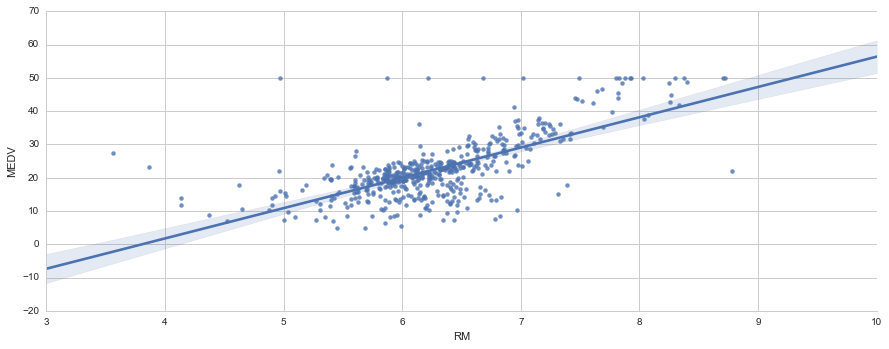

In [8]:
import seaborn as sns; sns.set(color_codes = True)
sns.set_style("whitegrid")
sns.lmplot(x = 'RM', y = 'MEDV', data = df, ci = 95, aspect =2.5)
sns.lmplot(x = 'RM + RM2', y = 'MEDV', data=df, ci = 95, aspect = 2.5, line_kws={'color': 'red'})

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: It is always useful to include maximum number of iterations, otherwise a rogue estimation may go on forever.*

In [8]:
def predict_output(feature_matrix, weights):
    return np.dot(feature_matrix, weights)

In [9]:
def feature_derivative(errors, feature):
    errors = np.squeeze(np.asarray(errors))
    feature = np.squeeze(np.asarray(feature))
    return 2*np.dot(errors, feature)

In [10]:
def compute_rmse(predictions, output):
    return np.sqrt(np.mean((predictions-output)**2))

In [91]:
def gradient_descent(feature_matrix, output, initial_weights, R, tolerance, max_iter = 100000):
    """
    Function
    --------
    bivariate_ols: Gradient Decent to minimize OLS. Used to find coefficients of bivariate OLS Linear regression

    Parameters
    ----------
    xvalues, yvalues : narray xvalues: independent variable; yvalues: dependent variable
    R: float, Learning rate
    MaxIterations: Int, maximum number of iterations

    Returns
    -------
    alpha: float, intercept
    beta: float, co-efficient
    ttaken: time taken
    it: number of iterations
    convergence: logical, convergence achieved?
    """
    converged = False 
    weights = np.array(initial_weights)
    count = 0 
    start_time = timeit.default_timer()
    while not converged and count < max_iter:
        predictions = predict_output(feature_matrix, weights)
        
        
        errors = predictions - output 
       
        gradient_sum_squares = 0
        for i in xrange(len(weights)):
            gradient = feature_derivative(errors, feature_matrix[:,i])
            gradient_sum_squares += gradient**2
            weights[i] = weights[i] - R*gradient
        
        gradient_magnitude = np.sqrt(gradient_sum_squares)
        
        if gradient_magnitude < tolerance:
            converged = True 
        
        count+=1
        
        
    elapsed = timeit.default_timer() - start_time
        
    return weights, elapsed, count, converged 

In [64]:
X_df['constant'] = 1 
features = ['constant','RM']
feature_df = X_df[features]
feature_matrix = feature_df.as_matrix()
output = Y_df.as_matrix()
initial_weights = [0. for i in range(len(feature_matrix[0]))]
initial_weights = np.array(initial_weights).reshape(-1,1)
step_size = 0.00003

In [65]:
import timeit
weights, time_taken, iterations, converged = gradient_descent(feature_matrix, output, initial_weights, step_size,tolerance = 2, max_iter=2) 

149596.333265
36514.5285909


In [14]:
print 'Weights : {0}'.format(weights)
print 'Time Taken (in seconds):{0}'.format(time_taken)
print 'Iterations needed {0}'.format(iterations)
print 'Converged (T/F): {0}'.format(converged)

Weights : [[-34.50831023]
 [  9.07659294]]
Time Taken (in seconds):1.61801195145
Iterations needed 14736
Converged (T/F): True


In [15]:
test_predictions = predict_output(feature_matrix, weights)
compute_rmse(test_predictions,output)

6.6030959676516652

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [16]:
def standardize(raw_data):
    """
    standardizes raw data and returns
    standardized data, mean by column, sd by column
    """
    mu = np.mean(raw_data, axis = 0)
    sd = np.std(raw_data, axis = 0)
    return (raw_data - mu) / sd, mu, sd


### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with the following values of R: 0.1, 0.01, and 0.001.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [17]:
data = X_df[['CRIM','RM']].as_matrix()
std_data, mean, sd = standardize(data)
constant_col = np.array([1 for i in range(len(data))]).reshape(-1,1)

std_data = np.append(constant_col, std_data,1)
step_list = [0.1,0.01,0.001]
initial_weights = [0. for i in range(len(std_data[0]))]
print initial_weights
initial_weights = np.array(initial_weights).reshape(-1,1)
for step_size in step_list:
    weights, time_taken, iteration, converged = gradient_descent(std_data, output, initial_weights, step_size,tolerance = 2e-7)
    print 'For step_size : {0}'.format(step_size)
    print '------------------------------'
    print 'Weights : {0}'.format(weights)
    print 'Time Taken (in seconds):{0}'.format(time_taken)
    print 'Iterations needed {0}'.format(iteration)
    print 'Converged (T/F): {0}'.format(converged)
    test_predictions = predict_output(std_data, weights)
    rmse = compute_rmse(test_predictions,output)
    print 'RMSE : {0}'.format(rmse)

[0.0, 0.0, 0.0]
For step_size : 0.1
------------------------------
Weights : [[ nan]
 [ nan]
 [ nan]]
Time Taken (in seconds):16.7606601715
Iterations needed 100000
Converged (T/F): False
RMSE : nan
For step_size : 0.01
------------------------------
Weights : [[ nan]
 [ nan]
 [ nan]]
Time Taken (in seconds):14.9935870171
Iterations needed 100000
Converged (T/F): False
RMSE : nan
For step_size : 0.001
------------------------------
Weights : [[ 22.53280632]
 [ -2.24860926]
 [  5.89441657]]
Time Taken (in seconds):0.00164103507996
Iterations needed 18
Converged (T/F): True
RMSE : 6.22807325025


### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [18]:
data = X_df[['CRIM','RM']].as_matrix()
constant_col = np.array([1 for i in range(len(data))]).reshape(-1,1)

data = np.append(constant_col, data,1)
step_list = [0.1,0.01,0.001]
initial_weights = [0. for i in range(len(data[0]))]
print initial_weights
initial_weights = np.array(initial_weights).reshape(-1,1)
for step_size in step_list:
    weights, time_taken, iteration, converged = gradient_descent(data, output, initial_weights, step_size,tolerance = 2e-7)
    print 'For step_size : {0}'.format(step_size)
    print '------------------------------'
    print 'Weights : {0}'.format(weights)
    print 'Time Taken (in seconds): {0}'.format(time_taken)
    print 'Iterations needed {0}'.format(iteration)
    print 'Converged (T/F): {0}'.format(converged)
    test_predictions = predict_output(data, weights)
    rmse = compute_rmse(test_predictions,output)
    print 'RMSE : {0}'.format(rmse)

[0.0, 0.0, 0.0]
For step_size : 0.1
------------------------------
Weights : [[ nan]
 [ nan]
 [ nan]]
Time Taken (in seconds): 15.5306999683
Iterations needed 100000
Converged (T/F): False
RMSE : nan
For step_size : 0.01
------------------------------
Weights : [[ nan]
 [ nan]
 [ nan]]
Time Taken (in seconds): 15.4249379635
Iterations needed 100000
Converged (T/F): False
RMSE : nan
For step_size : 0.001
------------------------------
Weights : [[ nan]
 [ nan]
 [ nan]]
Time Taken (in seconds): 15.6460180283
Iterations needed 100000
Converged (T/F): False
RMSE : nan


## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multiple regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [103]:
# using k-fold cross validation code from Problem Set 3 
def k_cross_validation(data, features, initial_weights, R, tolerance, folds = 10, verbose=False):
    if features == []:
        data['constant'] = 1
        features = ['constant'] + list(data.columns) + ['MEDV']
        total_data = data[features]
        len_features = total_data.shape[1] -1
    else:
        len_features = len(features) + 1
        data['constant'] = 1
        features = ['constant'] + features + ['MEDV']
        total_data = data[features]
    
    
    # creating index slices 
    total_indices = list(total_data.index)
    
    np.random.seed(100)
    np.random.shuffle(total_indices)
    
    remaining_k = []
    size_partition = len(total_indices)/folds
    rmse_list = []
    
    
    for i in range(1,folds+1):
        if verbose == True:
            print 'Iteration :{0}'.format(i)
            print '----------------------------'
        test = total_indices[(i-1)*size_partition:i*size_partition]
        
        test1_data = total_data.iloc[test].as_matrix()
        test_data,mu, sd = standardize(test1_data[:,1:len_features])
        
        constant_col = np.array([1 for j in range(len(test1_data))]).reshape(-1,1)
        
        test_data = np.append(constant_col,test_data, 1)
        
        test_output = test1_data[:,len_features]
        
        if verbose == True:
            print 'Test data index {0}, {1}'.format((i-1)*size_partition,i*size_partition)
            print 'Test data size :{0}'.format(test_data.shape)
        remaining_k += test
        rem = list(set(test)^set(remaining_k))
       
        train = rem + total_indices[i*size_partition:]
        
        train1_data = total_data.iloc[train].as_matrix()
        
        train_std_data,mu, sd = standardize(train1_data[:,1:len_features])
        
        constant_col = np.array([1 for j in range(len(train_std_data))]).reshape(-1,1)
        
        train_data = np.append(constant_col,train_std_data, 1)
        
        train_output = train1_data[:,len_features]
        
        if verbose == True:
            print 'Train data size :{0}'.format(train_data.shape)
        # calculate weights using the training data 
        
        weights, time_taken, iterations, converged = gradient_descent(train_data, train_output, initial_weights, R,tolerance)
        
        predictions = predict_output(test_data,weights)
        print weights
        print iterations 
         
        pred = np.array(predictions)
        rmse = compute_rmse(pred,test_output)
        if verbose == True:
            print 'RMSE :{0}'.format(rmse)
            print ' '
        rmse_list.append(rmse)
    return rmse_list, predictions, test_output

In [104]:
import random
import timeit
initial_weights = [0. for i in range(3)]
list1, predictions, output = k_cross_validation(df, features = ['CRIM','RM'],initial_weights = initial_weights, R = 0.001, tolerance = 2e-5, folds = 10, verbose = False)

[ 22.53662281  -2.20775313   5.66693171]
18
[ 22.56315789  -2.15439924   5.91251261]
16
[ 22.58223684  -2.3482798    5.88996288]
16
[ 22.45526316  -2.29952735   5.90164635]
16
[ 22.53574561  -2.42882689   5.83031776]
16
[ 22.6997807   -2.11606282   5.96905483]
16
[ 22.67127193  -2.28318455   5.96228079]
16
[ 22.17565789  -2.37163984   5.67846343]
16
[ 22.3375      -2.21834354   6.03094758]
16
[ 22.79714912  -2.05867894   6.12318956]
16


In [54]:
#Trying a train-test split

In [106]:
np.mean(list1)

6.2518306308287963

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?  How does it compare to RMSE from a simpler model where number of rooms is the only explanatory variable?

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features.  Note: as all the original features are numeric, you can just multiply.  If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [ ]:
# create interaction terms 
# from sklearn.preprocessing import PolynomialFeatures


### 4.2 Let's overfit!
Now, using your version of multiple regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

### 4.3 Ridge regularization
a) Incorporate L2 (Ridge) regularization into your multiple_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

b) Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

c) Go brag to your friends about how you just implemented ridge-regularized multiple regression using gradient descent optimization, from scratch (if you still have any friends left...)

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a plot that shows RMSE as a function of lambda.

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot